## 7.14.2 `DataFrames` 
* Enhanced two-dimensional `array`
* Can have custom row and column indices
* Offers additional operations and capabilities that make them more convenient for many data-science oriented tasks
* Support missing data
* Each column in a `DataFrame` is a `Series`

### Creating a `DataFrame` from a Dictionary
* Create a `DataFrame` from a dictionary that represents student grades on three exams

In [1]:
import pandas as pd

In [2]:
grades_dict = {'Wally': [87, 96, 70], 'Eva': [100, 87, 90],
               'Sam': [94, 77, 90], 'Katie': [100, 81, 82],
               'Bob': [83, 65, 85]}

In [3]:
grades = pd.DataFrame(grades_dict)

* Pandas displays `DataFrame`s in tabular format with indices _left aligned_ in the index column and the remaining columns’ values _right aligned_

In [4]:
grades

Wally  Eva  Sam  Katie  Bob
0     87  100   94    100   83
1     96   87   77     81   65
2     70   90   90     82   85

### Customizing a `DataFrame`’s Indices with the `index` Attribute 
* Can use the **`index` attribute** to change the `DataFrame`’s indices from sequential integers to labels
* Must provide a one-dimensional collection that has the same number of elements as there are _rows_ in the `DataFrame`

In [5]:
grades.index = ['Test1', 'Test2', 'Test3']

In [6]:
grades

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85

### Accessing a `DataFrame`’s Columns 
* Can quickly and conveniently look at your data in many different ways, including selecting portions of the data
* Get `Eva`’s grades by name
* Displays her column as a `Series`

In [10]:
grades.iloc[1:3]
#same as grades.iloc[[1,2]]

Wally  Eva  Sam  Katie  Bob
Test2     96   87   77     81   65
Test3     70   90   90     82   85

* If a `DataFrame`’s column-name strings are valid Python identifiers, you can use them as attributes

In [13]:
grades.mean()

Wally    84.333333
Eva      92.333333
Sam      87.000000
Katie    87.666667
Bob      77.666667
dtype: float64

In [49]:
grades

Wally  Eva  Sam  Katie  Bob  Jack
Test1     87  100   94    100   83    87
Test2     96  100   77     81   65    65
Test3     70   90   90     82   85    78

In [74]:
#maxi = grades.Wally.max()
#print(grades[grades == maxi])

grades2 = grades.T
grades

Wally  Eva  Sam  Katie  Bob  Jack
Test1     87  100   94    100   83    87
Test2     96  100   77     81   65    65
Test3     70   90   90     82   85    78

In [75]:
grades.loc[grades['Eva'].idxmax()]

Wally     87
Eva      100
Sam       94
Katie    100
Bob       83
Jack      87
Name: Test1, dtype: int64

In [14]:
import matplotlib as plt
import seaborn as sb
%matplotlib inline 

In [15]:
plt.style.use('seaborn-whitegrid')

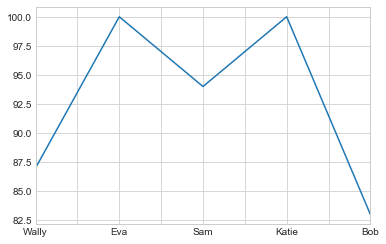

In [16]:
grades.loc['Test1'].T.plot()

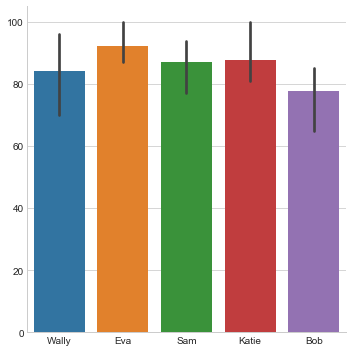

In [18]:
sb.catplot(data=grades, kind="bar")

### Selecting Rows via the `loc` and `iloc` Attributes
* `DataFrame`s support indexing capabilities with `[]`, but pandas documentation recommends using the attributes `loc`, `iloc`, `at` and `iat`
    * Optimized to access `DataFrame`s and also provide additional capabilities 
* Access a row by its label via the `DataFrame`’s **`loc` attribute**

In [9]:
grades.loc['Test1']

Wally     87
Eva      100
Sam       94
Katie    100
Bob       83
Name: Test1, dtype: int64

* Access rows by integer zero-based indices using the **`iloc` attribute** (the `i` in `iloc` means that it’s used with integer indices)

In [10]:
grades.iloc[1]

Wally    96
Eva      87
Sam      77
Katie    81
Bob      65
Name: Test2, dtype: int64

### Selecting Rows via Slices and Lists with the `loc` and `iloc` Attributes
* Index can be a _slice_
* When using slices containing **labels** with `loc`, the range specified **includes** the high index (`'Test3'`):

In [11]:
grades.loc['Test1':'Test3']

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85

* When using slices containing **integer indices** with `iloc`, the range you specify **excludes** the high index (`2`):

In [12]:
grades.iloc[0:2]

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65

* Select _specific rows_ with a _list_ 

In [13]:
grades.loc[['Test1', 'Test3']]

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test3     70   90   90     82   85

In [21]:
grades.iloc[[0, 2]]

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test3     70   90   90     82   85

### Selecting Subsets of the Rows and Columns 
* View only `Eva`’s and `Katie`’s grades on `Test1` and `Test2`

In [15]:
grades.loc['Test1':'Test2', ['Eva', 'Katie']]

Eva  Katie
Test1  100    100
Test2   87     81

* Use `iloc` with a list and a slice to select the first and third tests and the first three columns for those tests

In [16]:
grades.iloc[[0, 2], 0:3]

Wally  Eva  Sam
Test1     87  100   94
Test3     70   90   90

### Boolean Indexing
* One of pandas’ more powerful selection capabilities is **Boolean indexing**
* Select all the A grades—that is, those that are greater than or equal to 90:
    * Pandas checks every grade to determine whether its value is greater than or equal to 90 and, if so, includes it in the new `DataFrame`.
    * Grades for which the condition is `False` are represented as **`NaN` (not a number)** in the new `DataFrame
    * `NaN` is pandas’ notation for missing values

In [24]:
grades[grades >= 90]

Wally    Eva   Sam  Katie  Bob
Test1    NaN  100.0  94.0  100.0  NaN
Test2   96.0    NaN   NaN    NaN  NaN
Test3    NaN   90.0  90.0    NaN  NaN

* Select all the B grades in the range 80–89

In [27]:
grades[(grades >= 80) & (grades < 90)]

Wally   Eva  Sam  Katie   Bob
Test1   87.0   NaN  NaN    NaN  83.0
Test2    NaN  87.0  NaN   81.0   NaN
Test3    NaN   NaN  NaN   82.0  85.0

* Pandas Boolean indices combine multiple conditions with the Python operator `&` (bitwise AND), _not_ the `and` Boolean operator
* For `or` conditions, use `|` (bitwise OR)
* NumPy also supports Boolean indexing for `array`s, but always returns a one-dimensional array containing only the values that satisfy the condition

### Accessing a Specific `DataFrame` Cell by Row and Column
* `DataFrame` method **`at`** and **`iat`** attributes get a single value from a `DataFrame`

In [31]:
grades.loc['Test2', 'Eva']

87

In [32]:
grades.iloc[2, 0]

70

* Can assign new values to specific elements

In [33]:
grades

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85

In [34]:
grades.at['Test2', 'Eva'] = 100
grades

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96  100   77     81   65
Test3     70   90   90     82   85

In [36]:
grades['Jack']=[87,65,78]
grades

Wally  Eva  Sam  Katie  Bob  Jack
Test1     87  100   94    100   83    87
Test2     96  100   77     81   65    65
Test3     70   90   90     82   85    78

In [40]:
grades.drop(['Jack'],axis = 1)

Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96  100   77     81   65
Test3     70   90   90     82   85

In [22]:
grades.at['Test2', 'Eva']

100

In [23]:
grades.iat[1, 2] = 87

In [24]:
grades.iat[1, 2]

87

### Descriptive Statistics
* `DataFrame`s **`describe` method** calculates basic descriptive statistics for the data and returns them as a `DataFrame`
* Statistics are calculated by column 

In [25]:
grades.describe()

Wally         Eva        Sam       Katie        Bob
count   3.000000    3.000000   3.000000    3.000000   3.000000
mean   84.333333   96.666667  90.333333   87.666667  77.666667
std    13.203535    5.773503   3.511885   10.692677  11.015141
min    70.000000   90.000000  87.000000   81.000000  65.000000
25%    78.500000   95.000000  88.500000   81.500000  74.000000
50%    87.000000  100.000000  90.000000   82.000000  83.000000
75%    91.500000  100.000000  92.000000   91.000000  84.000000
max    96.000000  100.000000  94.000000  100.000000  85.000000

* Quick way to summarize your data
* Nicely demonstrates the power of array-oriented programming with a clean, concise functional-style call
* Can control the precision and other default settings with pandas’ **`set_option` function**

In [26]:
pd.set_option('precision', 2)

In [26]:
grades.describe()

Wally         Eva        Sam       Katie        Bob
count   3.000000    3.000000   3.000000    3.000000   3.000000
mean   84.333333   92.333333  87.000000   87.666667  77.666667
std    13.203535    6.806859   8.888194   10.692677  11.015141
min    70.000000   87.000000  77.000000   81.000000  65.000000
25%    78.500000   88.500000  83.500000   81.500000  74.000000
50%    87.000000   90.000000  90.000000   82.000000  83.000000
75%    91.500000   95.000000  92.000000   91.000000  84.000000
max    96.000000  100.000000  94.000000  100.000000  85.000000

* For student grades, the most important of these statistics is probably the mean
* Can calculate that for each student simply by calling `mean` on the `DataFrame`

In [27]:
grades.mean(axis=1)

Test1    92.8
Test2    81.2
Test3    83.4
dtype: float64

### Transposing the `DataFrame` with the `T` Attribute
* Can quickly **transpose** rows and columns—so the rows become the columns, and the columns become the rows—by using the **`T` attribute** to get a view

In [29]:
grades.T

Test1  Test2  Test3
Wally     87     96     70
Eva      100    100     90
Sam       94     87     90
Katie    100     81     82
Bob       83     65     85

* Assume that rather than getting the summary statistics by student, you want to get them by test
* Call `describe` on `grades.T`

In [30]:
grades.T.describe()

Test1   Test2  Test3
count    5.00    5.00   5.00
mean    92.80   85.80  83.40
std      7.66   13.81   8.23
min     83.00   65.00  70.00
25%     87.00   81.00  82.00
50%     94.00   87.00  85.00
75%    100.00   96.00  90.00
max    100.00  100.00  90.00

* Get average of all the students’ grades on each test

In [31]:
grades.T.mean()

Test1    92.8
Test2    85.8
Test3    83.4
dtype: float64

### Sorting by Rows by Their Indices
* Can sort a `DataFrame` by its rows or columns, based on their indices or values
* Sort the rows by their _indices_ in _descending_ order using **`sort_index`** and its keyword argument `ascending=False` 

In [32]:
grades.sort_index(ascending=False)

Wally  Eva  Sam  Katie  Bob
Test3     70   90   90     82   85
Test2     96  100   87     81   65
Test1     87  100   94    100   83

### Sorting by Column Indices
* Sort columns into ascending order (left-to-right) by their column names
* **`axis=1` keyword argument** indicates that we wish to sort the _column_ indices, rather than the row indices
    * `axis=0` (the default) sorts the _row_ indices

In [33]:
grades.sort_index(axis=1)

Bob  Eva  Katie  Sam  Wally
Test1   83  100    100   94     87
Test2   65  100     81   87     96
Test3   85   90     82   90     70

### Sorting by Column Values
* To view `Test1`’s grades in descending order so we can see the students’ names in highest-to-lowest grade order, call method **`sort_values`**
* `by` and `axis` arguments work together to determine which values will be sorted
    * In this case, we sort based on the column values (`axis=1`) for `Test1`

In [34]:
grades.sort_values(by='Test1', axis=1, ascending=False)

Eva  Katie  Sam  Wally  Bob
Test1  100    100   94     87   83
Test2  100     81   87     96   65
Test3   90     82   90     70   85

* Might be easier to read the grades and names if they were in a column
* Sort the transposed `DataFrame` instead

In [35]:
grades.T.sort_values(by='Test1', ascending=False)

Test1  Test2  Test3
Eva      100    100     90
Katie    100     81     82
Sam       94     87     90
Wally     87     96     70
Bob       83     65     85

* Since we’re sorting only `Test1`’s grades, we might not want to see the other tests at all
* Combine selection with sorting

In [36]:
grades.loc['Test1'].sort_values(ascending=False)

Katie    100
Eva      100
Sam       94
Wally     87
Bob       83
Name: Test1, dtype: int64

### Copy vs. In-Place Sorting
* `sort_index` and `sort_values` return a _copy_ of the original `DataFrame`
* Could require substantial memory in a big data application
* Can sort _in place_ by passing the keyword argument `inplace=True` 

------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 5 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).

DISCLAIMER: The authors and publisher of this book have used their 
best efforts in preparing the book. These efforts include the 
development, research, and testing of the theories and programs 
to determine their effectiveness. The authors and publisher make 
no warranty of any kind, expressed or implied, with regard to these 
programs or to the documentation contained in these books. The authors 
and publisher shall not be liable in any event for incidental or 
consequential damages in connection with, or arising out of, the 
furnishing, performance, or use of these programs.                  